In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
Iris=pd.read_csv('/content/drive/MyDrive/Data Analytics/Iris.csv')
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
Iris.drop('SepalLengthCm',axis=1,inplace=True)

In [ ]:
Iris.drop('SepalWidthCm',axis=1,inplace=True)
Iris

,Id,PetalLengthCm,PetalWidthCm,Species
0,1,1.4,0.2,Iris-setosa
1,2,1.4,0.2,Iris-setosa
2,3,1.3,0.2,Iris-setosa
3,4,1.5,0.2,Iris-setosa
4,5,1.4,0.2,Iris-setosa
...,...,...,...,...
145,146,5.2,2.3,Iris-virginica
146,147,5.0,1.9,Iris-virginica
147,148,5.2,2.0,Iris-virginica
148,149,5.4,2.3,Iris-virginica


In [ ]:
Iris.drop('Id',axis=1,inplace=True)
Iris

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

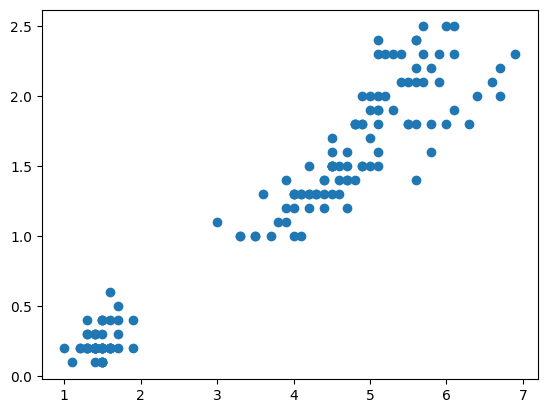

In [ ]:
plt.scatter(Iris['PetalLengthCm'],Iris['PetalWidthCm'])

In [ ]:
Iris['Species']=Iris['Species'].astype('category')
Iris['Species']=Iris['Species'].cat.codes

In [ ]:
Iris


,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [ ]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(Iris[['PetalLengthCm','PetalWidthCm']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
Iris['cluster']=y_predicted
Iris.head()

,PetalLengthCm,PetalWidthCm,Species,cluster
0,1.4,0.2,0,0
1,1.4,0.2,0,0
2,1.3,0.2,0,0
3,1.5,0.2,0,0
4,1.4,0.2,0,0


In [ ]:
km.cluster_centers_

array([[1.464     , 0.244     ],
       [4.29259259, 1.35925926],
       [5.62608696, 2.04782609]])

/tmp/ipython-input-15-952869135.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


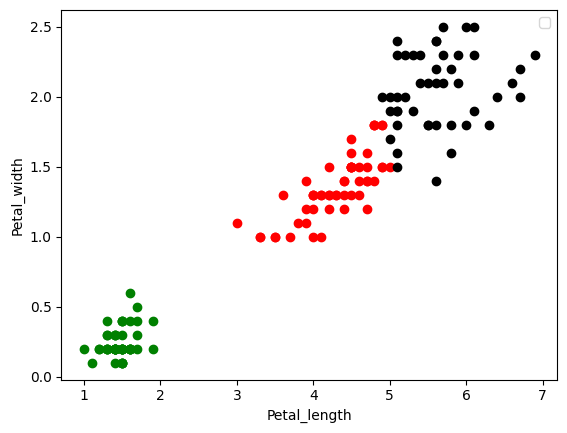

In [ ]:
Iris1=Iris[Iris.cluster==0]
Iris2=Iris[Iris.cluster==1]
Iris3=Iris[Iris.cluster==2]
plt.scatter(Iris1.PetalLengthCm,Iris1.PetalWidthCm,color='green')
plt.scatter(Iris2.PetalLengthCm,Iris2.PetalWidthCm,color='red')
plt.scatter(Iris3.PetalLengthCm,Iris3.PetalWidthCm,color='black')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Petal_length')
plt.ylabel('Petal_width')
plt.legend()

In [ ]:
scaler=MinMaxScaler()
scaler.fit(Iris[['PetalLengthCm','PetalWidthCm']])
scaled_data=scaler.transform(Iris[['PetalLengthCm','PetalWidthCm']])

In [ ]:
Iris.head()

,PetalLengthCm,PetalWidthCm,Species,cluster
0,1.4,0.2,0,0
1,1.4,0.2,0,0
2,1.3,0.2,0,0
3,1.5,0.2,0,0
4,1.4,0.2,0,0


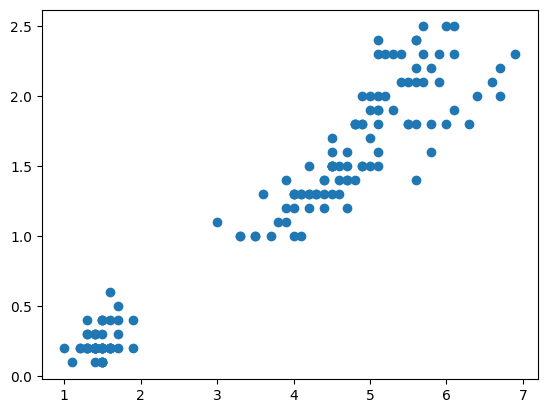

In [ ]:
plt.scatter(Iris['PetalLengthCm'],Iris['PetalWidthCm'])

In [ ]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(Iris[['PetalLengthCm','PetalWidthCm']])
y_predicted


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
km.cluster_centers_

array([[1.464     , 0.244     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

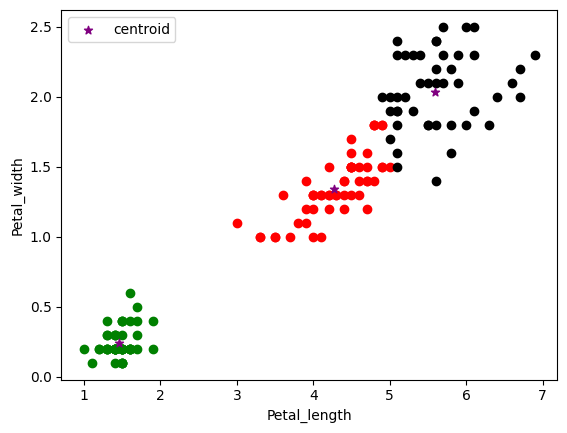

In [ ]:
Iris1=Iris[Iris.cluster==0]
Iris2=Iris[Iris.cluster==1]
Iris3=Iris[Iris.cluster==2]
plt.scatter(Iris1.PetalLengthCm,Iris1.PetalWidthCm,color='green')
plt.scatter(Iris2.PetalLengthCm,Iris2.PetalWidthCm,color='red')
plt.scatter(Iris3.PetalLengthCm,Iris3.PetalWidthCm,color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Petal_length')
plt.ylabel('Petal_width')
plt.legend()

In [ ]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(Iris[['PetalLengthCm','PetalWidthCm']])
  sse.append(km.inertia_)

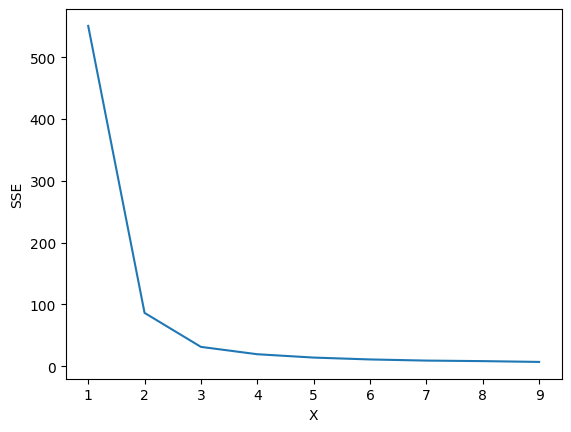

In [ ]:
plt.xlabel('X')
plt.ylabel('SSE')
plt.plot(k_rng,sse)